# Run the whole deltas algorithm

In [5]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import SVM_supports

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

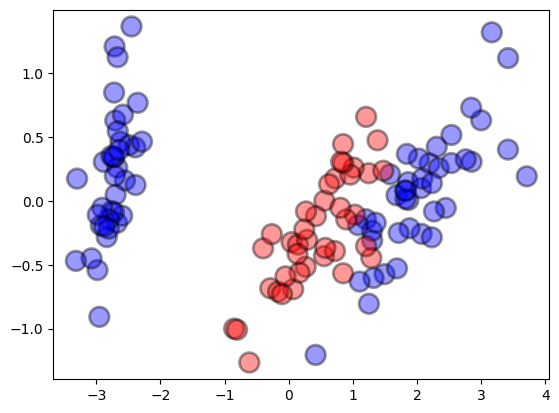

In [6]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[2]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=False)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


clf


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


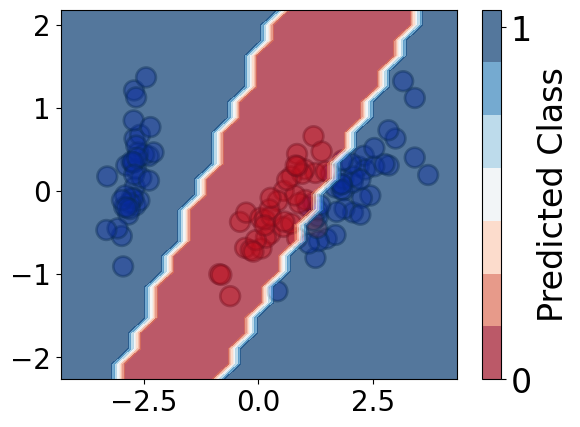

SMOTE


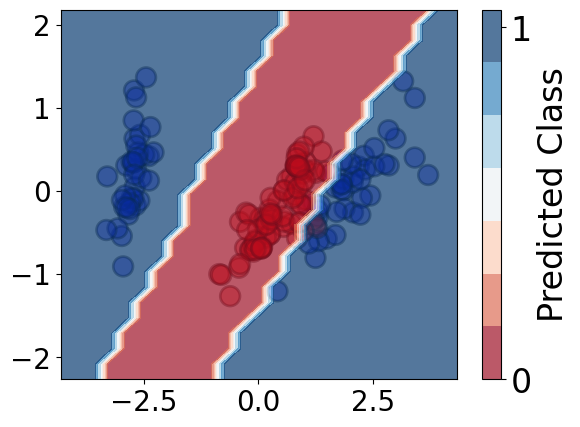

In [7]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
model = 'MLP'

balance_clf = True
balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)
data_clf['clf'] = classifiers_dict['original']                      

## Fit deltas

Original Classifier


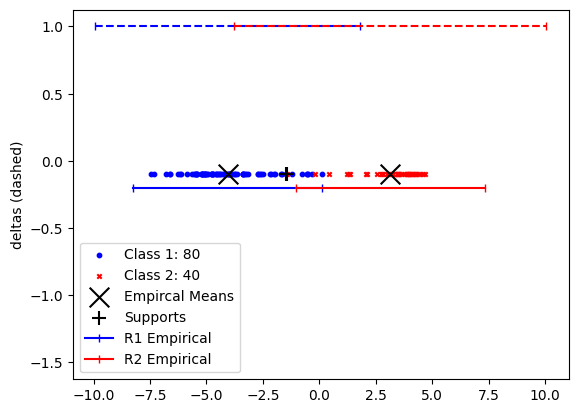

Reprojected Classifier


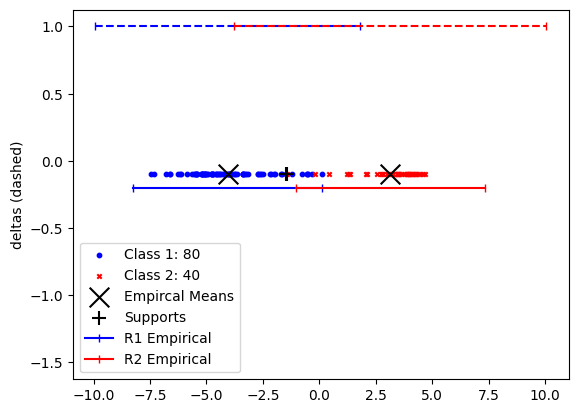

Supports from SVM removed


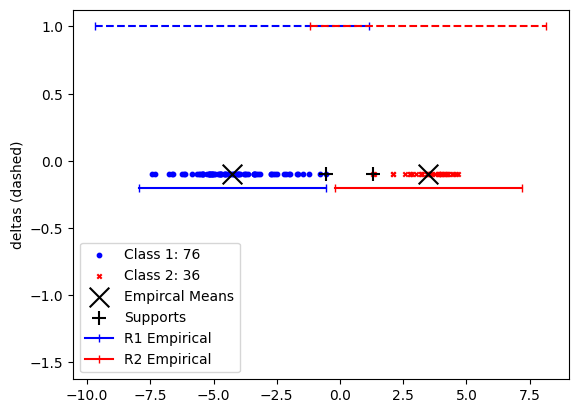

Fitting deltas using slacks if required
Original Data


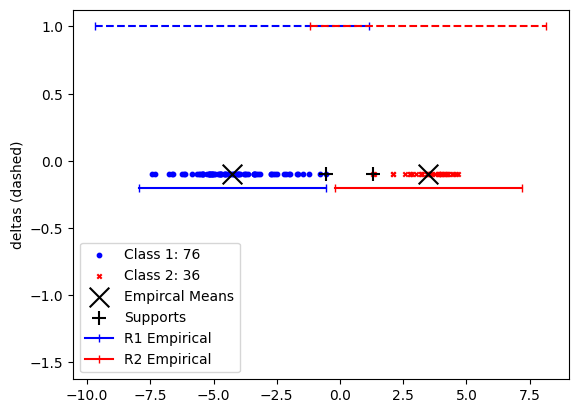

Budget 110 found 62 viable downsampled solutions
Best solution found by removing 47 data points
Downsampled Data:


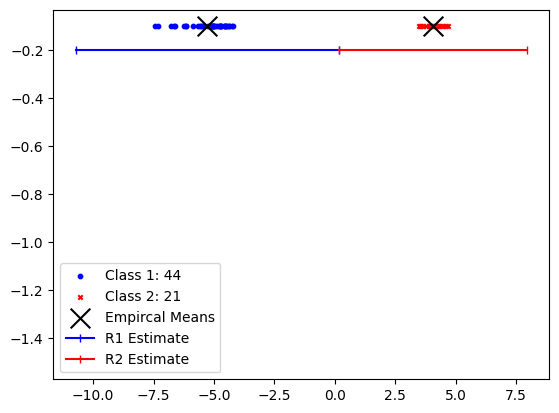

In [9]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = SVM_supports.SVM_supports_deltas(clf).fit(X, y,
                                                     alpha=0,
                                                     _print=True, 
                                                     _plot=True, 
                                                     max_trials=1000, 
                                                     method='supports-prop-update_mean-margin_only',
                                                    #  method='supports-prop-update_mean',
                                                     parallel=False)

## Plot training data information

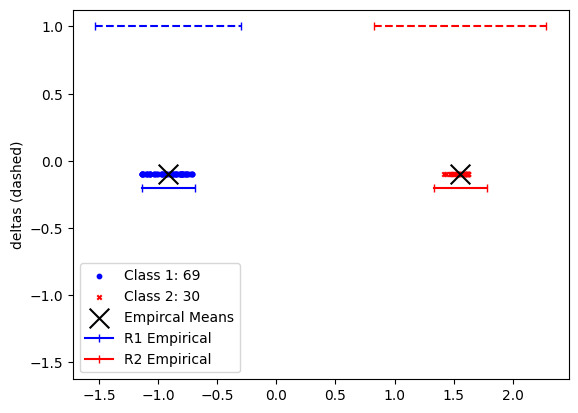

In [ ]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [ ]:
deltas_model.print_params()

Parameters
                R:  1.6215532822280103
                N1: 69
                N2: 30
                R1: 0.22406192179546003
                R2: 0.13640141269493467
                M:  2.1137972728502197
                D:  2.4742606073406144
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 1.0
SMOTE accuracy: 1.0
deltas accuracy: 1.0

original F1: 1.0
SMOTE F1: 1.0
deltas F1: 1.0

original precision1 (red): 1.0
SMOTE precision1 (red): 1.0
deltas precision1 (red): 1.0

original precision2 (blue): 1.0
SMOTE precision2 (blue): 1.0
deltas precision2 (blue): 1.0

original


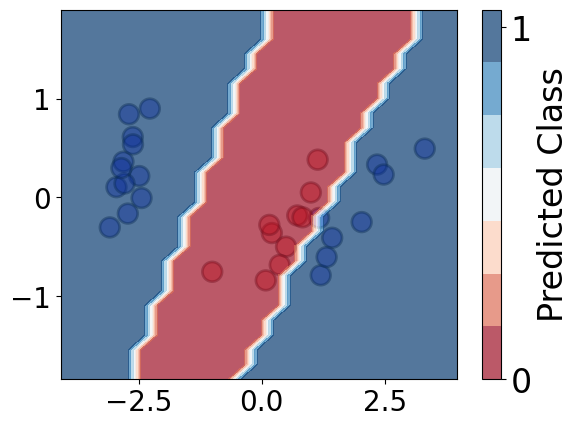

SMOTE


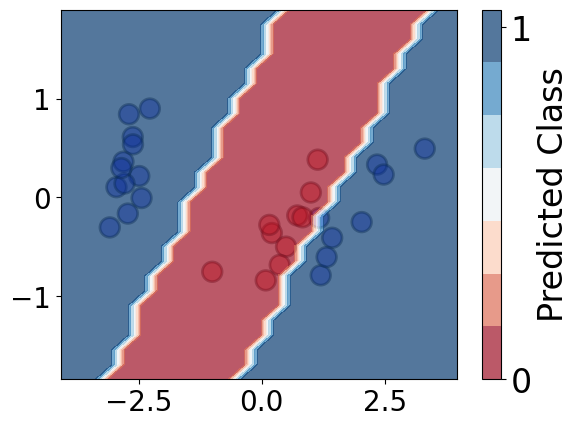

deltas


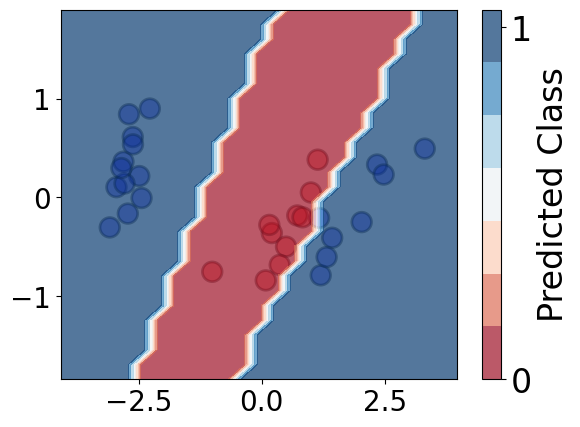

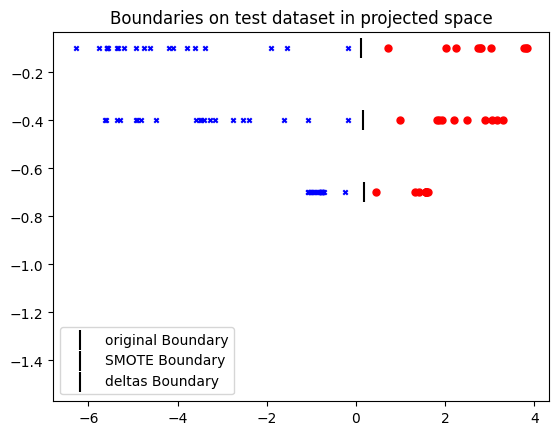

In [ ]:
classifiers_dict['deltas'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])